# Overview of Today's Class

* Unsupervised learning models
* Probability based learning
    * Bayesian statistics
    * Naive bayesian model
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows=None
pd.options.display.max_columns=None

# Unsupervised Learning: Clustering Methods

![](https://www.tutorialandexample.com/wp-content/uploads/2019/11/An-example-of-a-cluster-system.png)

![](https://fullcircle-cms.com/fullcircle/storage/uploads/2019/07/03/5d1ca1b9199dbClustering-GIF-2.gif)

## k-Means clustering

### The algorithm
* The model training process
![](https://stanford.edu/~cpiech/cs221/img/kmeansViz.png)

* Pseudo code:
![](https://stanford.edu/~cpiech/cs221/img/kmeansMath.png)

* The model training process (dynamic demonstration)
![](https://miro.medium.com/max/1280/1*rwYaxuY-jeiVXH0fyqC_oA.gif)

### Fit and predict

* Reference on function `make_blobs`: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

In [2]:
## generate some sample data

from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=123)

In [3]:
X

array([[-0.15181454,  2.41345093],
       [-1.39209388,  2.19069284],
       [-2.78188874,  1.88664335],
       ...,
       [-2.82048135,  1.81572732],
       [-2.8358594 ,  1.79380691],
       [-2.6970689 ,  1.77449632]])

In [4]:
X.shape

(2000, 2)

In [5]:
y

array([0, 1, 2, ..., 2, 2, 2])

In [6]:
np.unique(y)

array([0, 1, 2, 3, 4])

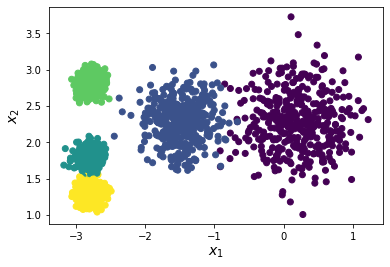

In [7]:
## plot the sample data

plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.show()

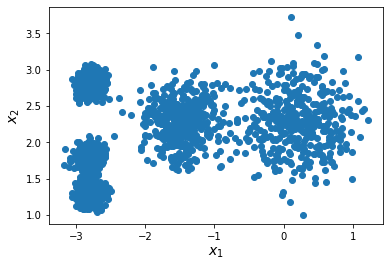

In [8]:
plt.scatter(X[:,0], X[:,1])
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.show()

In [9]:
## Fit a K-Means clustering model

from sklearn.cluster import KMeans


k = 5
kmeans = KMeans(n_clusters=k, random_state=123)
# kmenas.fit(X)
# y_pred = kmeans.predict(X)
y_pred = kmeans.fit_predict(X)

In [10]:
kmeans.labels_

array([1, 3, 4, ..., 4, 4, 4], dtype=int32)

In [11]:
kmeans.cluster_centers_

array([[-2.79959856,  1.30967879],
       [ 0.22211271,  2.29488501],
       [-2.7979204 ,  2.80239567],
       [-1.45400251,  2.28240421],
       [-2.80240931,  1.80817477]])

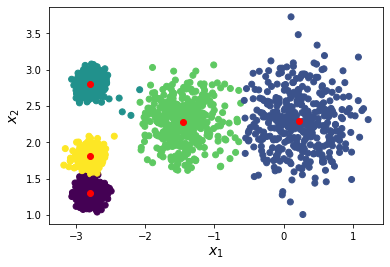

In [12]:
## plot the estimated centroids with the raw data

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='r')
    
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.show()

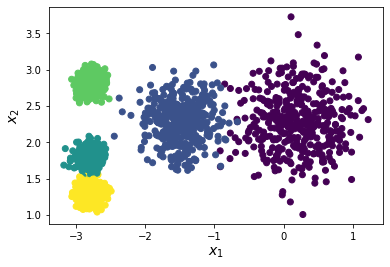

In [13]:
## plot the sample data

plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.show()

In [14]:
## predict labels of new instances

X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

In [15]:
kmeans.transform(X_new)

array([[2.88345201, 0.36917641, 2.91070393, 1.48117367, 2.80896687],
       [5.84053823, 2.79349512, 5.85318031, 4.4629464 , 5.80557927],
       [1.70215937, 3.29836284, 0.28263694, 1.70442129, 1.20809332],
       [1.20707303, 3.22863477, 0.36370222, 1.56123546, 0.71948887]])

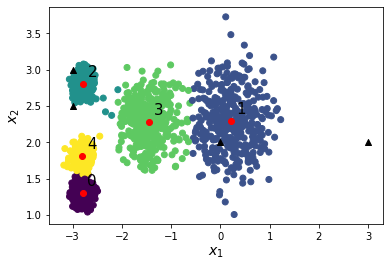

In [16]:
## visualize the new data points

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='r')
plt.scatter(X_new[:,0], X_new[:,1], marker='^', c='k')


#### label the clusters
centers = kmeans.cluster_centers_
labels = kmeans.predict(centers)
for i in range(5):
    plt.text(centers[i][0]+0.1, centers[i][1]+0.1, labels[i], fontsize=15)

plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.show()

### The decision boundaries (the `voronoi diagram`)

In [17]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=2,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

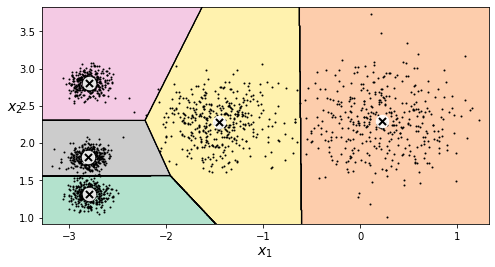

In [18]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
# plt.tight_layout()
plt.show()

In [19]:
X_new

array([[ 0. ,  2. ],
       [ 3. ,  2. ],
       [-3. ,  3. ],
       [-3. ,  2.5]])

### The algorithm demonstration

* Initialize the centroids randomly

In [20]:
## run the kmeans algorithm 1, 2, and 3 iterations, see how the centroids move around

kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=123)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=123)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=123)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=123)

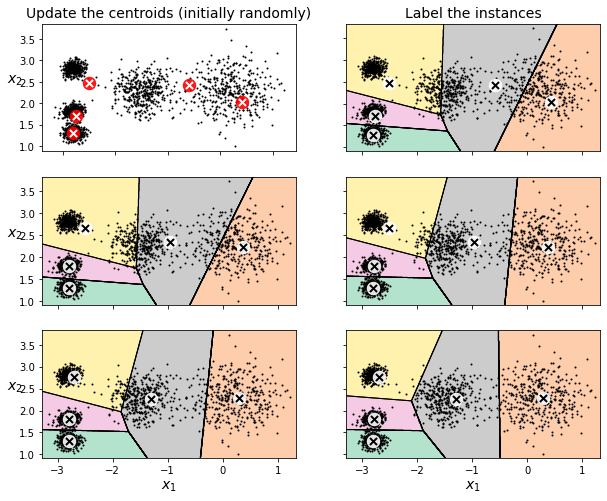

In [21]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

* Depending on the centroids initialization, the model might converge to different solutions (different local optimums)

In [22]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

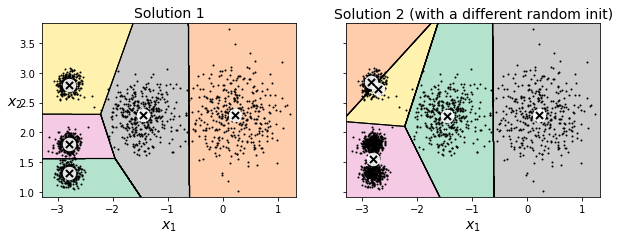

In [23]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=123)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=1)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

* Random number generator and seed

In [24]:
np.random.randint(low=0, high=3, size=5)

array([1, 2, 2, 1, 2])

In [25]:
np.random.randint(low=0, high=3, size=5)

array([2, 0, 0, 1, 2])

In [26]:
np.random.randint(low=0, high=3, size=5)

array([2, 1, 2, 1, 2])

In [27]:
np.random.seed(123)
np.random.randint(low=0, high=3, size=5)

array([2, 1, 2, 2, 0])

In [28]:
np.random.seed(123)
np.random.randint(low=0, high=3, size=5)

array([2, 1, 2, 2, 0])

In [29]:
np.random.randint(low=0, high=3, size=5)

array([2, 2, 1, 2, 1])

In [30]:
np.random.seed(123)
np.random.randint(low=0, high=3, size=5)

array([2, 1, 2, 2, 0])

In [31]:
np.random.seed(1)
np.random.randint(low=0, high=3, size=5)

array([1, 0, 0, 1, 1])

### Inertia

To select the best model, we will need a way to evaluate a K-Mean model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets. But at least we can measure the distance between each instance and its centroid. This is the idea behind the `inertia` metric: **sum of the squared distances between each training instance and its closest centroid**.

In [32]:
from sklearn.cluster import KMeans


k = 5
kmeans = KMeans(n_clusters=k, random_state=123)
kmeans.fit(X)
kmeans.inertia_

210.31915471169427

In [33]:
X.shape

(2000, 2)

In [34]:
X_dist = kmeans.transform(X)
X_dist.shape

(2000, 5)

In [35]:
X_dist[:5]

array([[2.86863611, 0.39227473, 2.67453813, 1.30876536, 2.71882546],
       [1.66049847, 1.61756574, 1.53314335, 0.11065105, 1.46126989],
       [0.57723629, 3.03161441, 0.91589264, 1.38560762, 0.08110741],
       [3.31699934, 0.25011248, 3.28019672, 1.8733141 , 3.23225278],
       [0.023597  , 3.1709066 , 1.51175269, 1.66030221, 0.51775487]])

In [36]:
kmeans.labels_[:5]

array([1, 3, 4, 1, 0], dtype=int32)

In [37]:
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

210.31915471169452

In [38]:
kmeans.score(X) # the negative inertia

-210.31915471169424

In [39]:
## multiple randomization

k = 5
kmeans_10 = KMeans(n_clusters=k, n_init=10)
kmeans_10.fit(X)
kmeans_10.inertia_

210.32338569890248

In [40]:
kmeans_100 = KMeans(n_clusters=k, n_init=100)
kmeans_100.fit(X)
kmeans_100.inertia_

210.3191547116942

In [41]:
kmeans_500 = KMeans(n_clusters=k, n_init=500)
kmeans_500.fit(X)
kmeans_500.inertia_

210.3191547116942

In [42]:
## compare the clustering outcome from two different random initialization of cluster centers
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=123)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=1)

kmeans_rnd_init1.fit(X)
kmeans_rnd_init2.fit(X)

KMeans(algorithm='full', init='random', n_clusters=5, n_init=1, random_state=1)

In [43]:
kmeans_rnd_init1.inertia_

210.32181314049237

In [44]:
kmeans_rnd_init2.inertia_

257.3488057150235

In [45]:
## manually assign initial centroids

good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans_m = KMeans(n_clusters=5, init=good_init, n_init=1)
kmeans_m.fit(X)
kmeans_m.inertia_

210.32181314049237

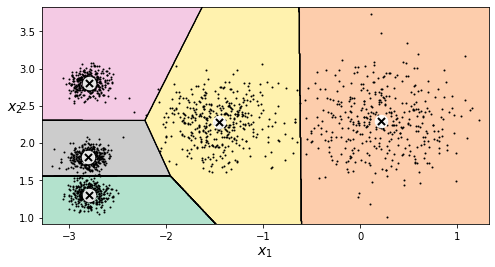

In [46]:
## visualize the best model

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_10, X)
plt.show()

### Find the optimal number of clusters - the "elbow" plot

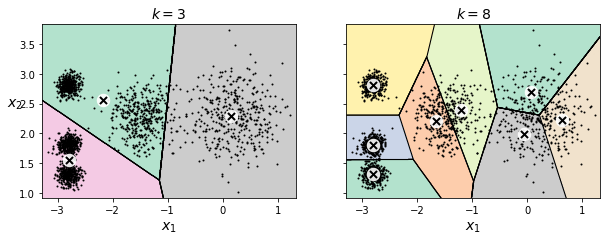

In [47]:
kmeans_k3 = KMeans(n_clusters=3)
kmeans_k8 = KMeans(n_clusters=8)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

In [48]:
kmeans_k3.inertia_

657.2636468168279

In [49]:
kmeans_k8.inertia_

120.8113947023054

In [50]:
## try different k values

kmeans_per_k = [KMeans(n_clusters=k).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

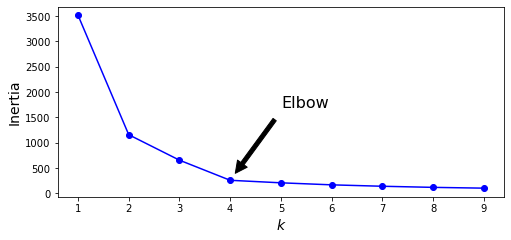

In [52]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
# plt.ylim(0, 1300)
plt.show()

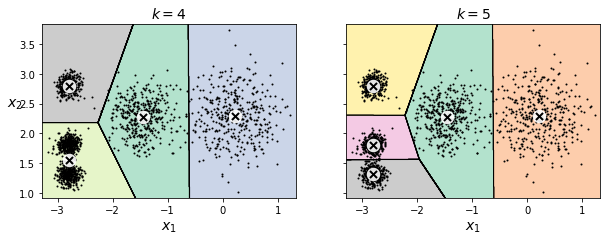

In [53]:
kmeans_k4 = KMeans(n_clusters=4)
kmeans_k5 = KMeans(n_clusters=5)

plot_clusterer_comparison(kmeans_k4, kmeans_k5, X, "$k=4$", "$k=5$")
plt.show()

As you can see, there is an elbow at $k=4$, which means that less clusters than that would be bad, and more clusters would not help much and might cut clusters in half. So $k=4$ is a pretty good choice. Of course in this example it is not perfect since it means that the two blobs in the lower left will be considered as just a single cluster, but it's a pretty good clustering nonetheless.

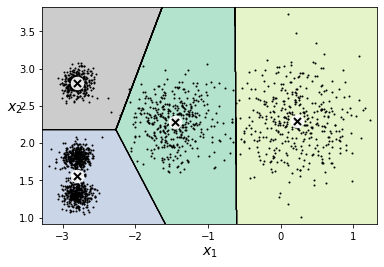

In [54]:
plot_decision_boundaries(kmeans_per_k[3], X)
plt.show()

### Find the optimal number of clusters - the `silhouette score`

The `silhouette score`, which is the mean silhouette coefficient over all the instances. An instance's silhouette coefficient is equal to $\frac{(b - a)}{\max(a, b)}$ where $a$ is the mean distance to the other instances in the same cluster (it is the mean intra-cluster distance), and $b$ is the mean nearest-cluster distance, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes $b$, excluding the instance's own cluster). The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

![](https://www.researchgate.net/profile/Frans_Coenen/publication/221570710/figure/fig1/AS:670029003644935@1536758771429/Derivation-of-the-Overall-Silhouette-Coefficient-OverallSil.png)

In [55]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.657769958414177

In [56]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

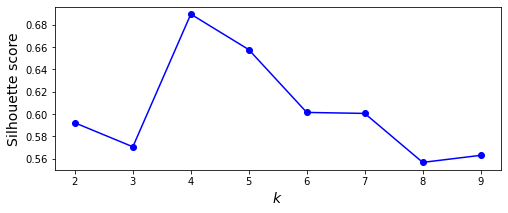

In [57]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

**It confirms that $k=4$ is a very good choice, and it also underlines the fact that $k=5$ is quite good as well, and much better than $k=6$ or $7$.**

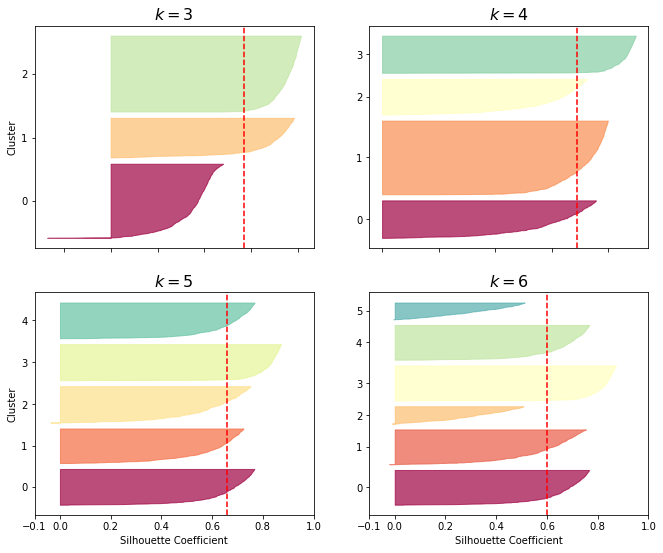

In [58]:
## the silhouette diagram

import matplotlib as mpl
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

## Limit of K-Means model

* Multiple run is needed to avoid suboptimal solutions
* Need to feed in a fixed `k` value
* Doesn't work well when clusters have varying sizes, different densities, or nonspherical shapes

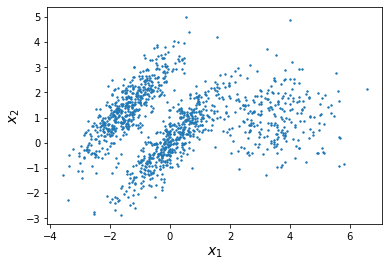

In [59]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

plt.scatter(X[:,0], X[:,1], s=2)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.show()

In [60]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

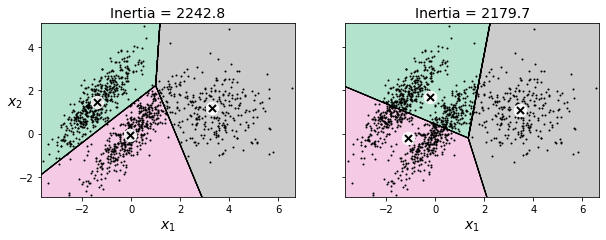

In [61]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()

`Gaussian mixture models` works better in this case
* Reference: https://scikit-learn.org/stable/modules/mixture.html

## Applications of k-Means clustering

### Image segmentation
* Reference
    * https://matplotlib.org/tutorials/introductory/images.html
    * https://matplotlib.org/3.3.2/api/image_api.html

In [62]:
from matplotlib.image import imread
image = imread('ladybug.png')
image.shape

(533, 800, 3)

In [64]:
type(image)

numpy.ndarray

In [63]:
X = image.reshape(-1, 3)
X.shape

(426400, 3)

In [65]:
x = np.array([1,2,3,4])
x[[0,0,1,1,2,2,3,3]]

array([1, 1, 2, 2, 3, 3, 4, 4])

In [66]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [67]:
segmented_img.shape

(533, 800, 3)

In [68]:
kmeans.cluster_centers_

array([[0.6125399 , 0.3834631 , 0.0919078 ],
       [0.02106073, 0.10577035, 0.00555678],
       [0.98402184, 0.9394511 , 0.02596575],
       [0.20604092, 0.37261117, 0.05183761],
       [0.60494375, 0.6332886 , 0.39152473],
       [0.89790183, 0.7377014 , 0.03253147],
       [0.34227258, 0.52337307, 0.15179412],
       [0.09099421, 0.24275412, 0.01513303]], dtype=float32)

In [69]:
kmeans.labels_

array([1, 1, 1, ..., 7, 7, 1], dtype=int32)

In [72]:
kmeans.cluster_centers_[kmeans.labels_]

array([[0.02106073, 0.10577035, 0.00555678],
       [0.02106073, 0.10577035, 0.00555678],
       [0.02106073, 0.10577035, 0.00555678],
       ...,
       [0.09099421, 0.24275412, 0.01513303],
       [0.09099421, 0.24275412, 0.01513303],
       [0.02106073, 0.10577035, 0.00555678]], dtype=float32)

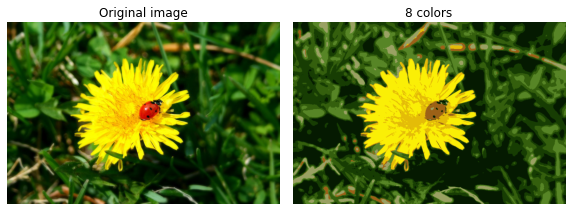

In [73]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(121)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

plt.subplot(122)
plt.imshow(segmented_img)
plt.title('8 colors')
plt.axis('off')
plt.show()

In [74]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))
    

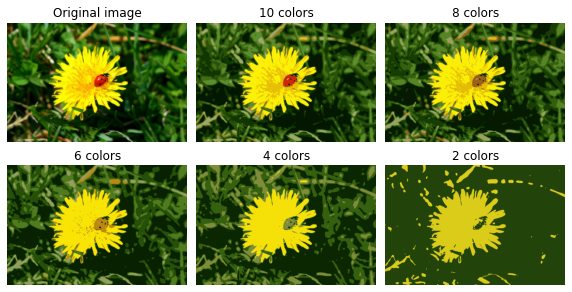

In [75]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

### Data preprocessing

* The data reference: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html
* A dataset silimiar like the `MNIST database`: https://en.wikipedia.org/wiki/MNIST_database
* Each datapoint is a 8x8 image of a digit.
| Classes           | 10            |
|-------------------|---------------|
| Samples per class | ~180          |
| Samples total     | 1797          |
| Dimensionality    | 64            |
| Features          | integers 0-16 |

In [76]:
## load the data

from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

In [77]:
X_digits.shape

(1797, 64)

In [78]:
y_digits.shape

(1797,)

In [79]:
np.unique(y_digits)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [80]:
## train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [81]:
X_train.shape

(1347, 64)

In [82]:
X_test.shape

(450, 64)

In [83]:
y_train.shape

(1347,)

In [84]:
y_test.shape

(450,)

The Logistic Regression model is typically used to fit/predict binary variable or variables with value between 0 and 1
$$
y = \sigma(z) = \frac{1}{1+e^{-z}} = \frac{1}{1+e^{-(\theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n)}}
$$


$\sigma(z)$ is also called the `sigmoid` function, it has the following property

$$
\frac{d\sigma(z)}{dz} = \sigma(z)(1-\sigma(z))
$$

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1200px-Logistic-curve.svg.png)

Linear Regression vs. Logistic Regression:
![](https://static.javatpoint.com/tutorial/machine-learning/images/linear-regression-vs-logistic-regression.png)
![](https://saedsayad.com/images/LogReg_1.png)

**Explain the logistic regression model fit**

$$
p = \sigma(z) = \frac{1}{1+e^{-z}} = \frac{1}{1+e^{-(\theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n)}}
$$

We could rewrite the relation to

$$
log(\frac{p}{1-p}) = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n
$$

In [85]:
## fit a logistic regression model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression() 
log_reg.fit(X_train, y_train)

/Users/xyin/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [86]:
## evaluate the model

log_reg.score(X_test, y_test)

0.9533333333333334

In [87]:
## Create a pipeline that will first cluster the training set into 50 clusters
## and replace the images with their distances to these 50 clusters, then apply a Logistic Regression model

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [88]:
pipeline.score(X_test, y_test)

0.9666666666666667

In [89]:
%%time

## apply grid search on the optimal number of clusters

from sklearn.model_selection import GridSearchCV


param_grid = dict(kmeans__n_clusters=range(95, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] kmeans__n_clusters=95 ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ kmeans__n_clusters=95, total=   4.3s
[CV] kmeans__n_clusters=95 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s


[CV] ............................ kmeans__n_clusters=95, total=   4.0s
[CV] kmeans__n_clusters=95 ...........................................
[CV] ............................ kmeans__n_clusters=95, total=   5.0s
[CV] kmeans__n_clusters=96 ...........................................
[CV] ............................ kmeans__n_clusters=96, total=   4.8s
[CV] kmeans__n_clusters=96 ...........................................
[CV] ............................ kmeans__n_clusters=96, total=   4.4s
[CV] kmeans__n_clusters=96 ...........................................
[CV] ............................ kmeans__n_clusters=96, total=   6.1s
[CV] kmeans__n_clusters=97 ...........................................
[CV] ............................ kmeans__n_clusters=97, total=   4.3s
[CV] kmeans__n_clusters=97 ...........................................
[CV] ............................ kmeans__n_clusters=97, total=   4.2s
[CV] kmeans__n_clusters=97 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.1min finished


CPU times: user 1min 41s, sys: 2.02 s, total: 1min 43s
Wall time: 1min 14s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(95, 100)}, verbose=2)

In [90]:
grid_clf.best_params_

{'kmeans__n_clusters': 98}

In [91]:
grid_clf.score(X_test, y_test)

0.9644444444444444

# Bayesian Theorem

![](https://miro.medium.com/max/1994/1*CnoTGGO7XeUpUMeXDrIfvA.png)


$$
\because P(A \cap B) = P(A|B)P(B) = P(B|A)P(A)
$$
$$
\therefore P(A|B) = \frac{P(B|A)P(A)}{P(B)}
$$


If we plug in $θ$ for $A$ and $X$ for $B$:

$$
P(\theta|X) = \dfrac{P(X|\theta) \cdot P(\theta)}{P(X)}
$$

Now we can plug in some terminology we know:

$$
Posterior = \dfrac{likelihood \cdot prior}{P(X)}
$$

Since

$$
P(X) = \sum_{\theta_i} P(X|\theta_i) \cdot P(\theta_i) = \sum_{\theta_i} likelihood \cdot prior
$$

The Bayesian theorem can be rewritten as

$$
Posterior = \dfrac{likelihood \cdot prior}{\sum_{\theta_i} likelihood \cdot prior}
$$


## The textbook example on Meningitis Diagnosing

In [ ]:
df = pd.read_csv('./Table6-1.csv', sep=',', header=0)

df.head()

After a yearly checkup, a doctor informs a patient that there is both bad news and good news. The bad news is that the patient has tested positive for a serious disease and that the test the doctor used is 99% accurate (i.e., the probability of testing positive when a patient has the disease is 0.99, as is the probability of testing negative when a patient does not have the disease). The good news, however, is that the disease is extremely rare, striking only 1 in 10,000 people. So what is the actual probability that the patient has the disease? And why is the rarity of the disease good news given that the patient has tested positive for it?

$$
P(d|t) = \dfrac{P(t|d) \cdot P(d)}{P(t)}
$$

We know
$$
P(d) = 0.0001
$$

and

$$
P(t|d) = 0.99
$$

$$
\because P(t|d) = 0.99
$$

$$
\therefore P(t|\bar{d}) = 0.01
$$

and

$$
P(t) = P(t|d)P(d) + P(t|\bar{d})P(\bar{d})
$$

In [ ]:
p_t = 0.99*0.0001 + 0.01*0.9999
p_dt = 0.99*0.0001/p_t
p_dt

## A little more complicated example

### Coin flip experiment

In [ ]:
import numpy as np
data_coin_flips = np.random.randint(low=0, high=2, size=1000)
np.mean(data_coin_flips)

In [ ]:
plt.hist(data_coin_flips)
plt.show()

In [ ]:
bernoulli_flips = np.random.binomial(n=1, p=.5, size=1000)
np.mean(bernoulli_flips)

### Based on the sample distribution, we could also have an idea about the parameter $p$

The trick here is to assume that our data are independent and identically distributed. This assumption allows us to say the probability of seeing all of our data is just the product of each individual probability: 
$$
p(x_1,…,x_n|\beta) = p(x_1|\beta) \cdot p(x_2|\beta) … \cdot p(x_n|\beta)
$$

In [ ]:
data_coin_flips[:10]

In [ ]:
import scipy.stats as st

np.product(st.bernoulli.pmf(data_coin_flips, .5))

In [ ]:
## plot the probability distribution of the parameter p given the experiment results of a fair coin 

params = np.linspace(0, 1, 100)
p_x = [np.product(st.bernoulli.pmf(data_coin_flips, p))*1e302 for p in params]
plt.plot(params, p_x)
plt.ylabel('$10^{-302}$')
plt.show()

In [ ]:
## an unfair coin

unfair_flips = bernoulli_flips = np.random.binomial(n=1, p=.8, size=1000)
p_unfair = np.array([np.product(st.bernoulli.pmf(unfair_flips, p)) for p in params])

plt.plot(params, p_unfair)
plt.show()

Since

$$
P(X) = \sum_{\theta_i} P(X|\theta_i) \cdot P(\theta_i) = \sum_{\theta_i} likelihood \cdot prior
$$

The Bayesian theorem can be rewritten as

$$
Posterior = \dfrac{likelihood \cdot prior}{\sum_{\theta_i} likelihood \cdot prior}
$$


In [ ]:
## The Bayesian theorem implementation

n_sample = 100
true_p = 0.8
prior_p = 0.5
n_prior = 100
n_params = 100


params = np.linspace(0, 1, n_params)
sample = np.random.binomial(n=1, p=true_p, size=n_sample)
prior_sample = np.random.binomial(n=1, p=prior_p, size=n_prior)

likelihood = np.array([np.product(st.bernoulli.pmf(sample, p)) for p in params])
prior = np.array([np.product(st.bernoulli.pmf(prior_sample, p)) for p in params])
prior = prior / np.sum(prior)

posterior = [prior[i] * likelihood[i] for i in range(prior.shape[0])]
posterior = posterior / np.sum(posterior)

In [ ]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8,8))
axes[0].plot(params, likelihood)
axes[0].set_title("Sampling Distribution")
axes[1].plot(params, prior)
axes[1].set_title("Prior Distribution")
axes[2].plot(params, posterior)
axes[2].set_title("Posterior Distribution with {} sample experiments".format(n_sample))
plt.show()

In [ ]:
## The Bayesian theorem implementation with 1000 samples

n_sample = 1000
true_p = 0.8
prior_p = 0.5
n_prior = 100
n_params = 100


params = np.linspace(0, 1, n_params)
sample = np.random.binomial(n=1, p=true_p, size=n_sample)
prior_sample = np.random.binomial(n=1, p=prior_p, size=n_prior)

likelihood = np.array([np.product(st.bernoulli.pmf(sample, p)) for p in params])
prior = np.array([np.product(st.bernoulli.pmf(prior_sample, p)) for p in params])
prior = prior / np.sum(prior)

posterior = [prior[i] * likelihood[i] for i in range(prior.shape[0])]
posterior = posterior / np.sum(posterior)

fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8,8))
axes[0].plot(params, likelihood)
axes[0].set_title("Sampling Distribution")
axes[1].plot(params, prior)
axes[1].set_title("Prior Distribution")
axes[2].plot(params, posterior)
axes[2].set_title("Posterior Distribution with {} sample experiments".format(n_sample))
plt.show()

## Naive Bayes Model


Machine Learning problem essentially can be desribed as learning a function $f(X)$ from the training data such that the predicted label $y=f(X)$ is close to the true value. The problem could well be framed as a probabilistic model, in which case we care about the probability of getting certain label $y_i$ given the input variables $x_1,x_2,...,x_n$.

$$
P(y_i|x_1,x_2,...,x_n) = \frac{P(x_1,x_2,...,x_n|y_i) \cdot P(y_i)}{P(x_1,x_2,...,x_n)}
$$

Since P(x_1,x_2,...,x_n) is a constant used in calculating the conditional probability of each class for a given instance and has the effect of normalizing the result. We can rewrite the above relation to something like below
$$
P(y_i|x_1,x_2,...,x_n) = P(x_1,x_2,...,x_n|y_i) \cdot P(y_i)
$$

If we assume that all input (explanatory) variables are independent from each other, the relation can then be further rewritten as
$$
P(y_i|x_1,x_2,...,x_n) = P(x_1|y_i) \cdot P(x_2|y_i) \cdot ... \cdot P(x_n|y_i) \cdot P(y_i)
$$

The prior value of $P(y_i)$, in a classification problem, could be calculated as the frequency of training records with label $y_i$ divided by the total number training records. The conditional probabilities of all input features can be calculated based on certain pre-assumed probability distribution. For example,
* Binary variable: Binomial distribution
* Categorical variable (>2 levels): Multinomial distribution
* Numeric variable: Gaussian distribution

Note that the probability can represent different things for discrete and continuous variables
* For discrete variable $x_m$, $P(x_m)$ represents the `probability mass function` value (https://en.wikipedia.org/wiki/Probability_mass_function)
* For continuous variable $x_n$, $P(x_n)$ represents the `probability density function` value (https://en.wikipedia.org/wiki/Probability_density_function)

### Example: Hand-craft Naive Bayes Model

* Reference
    * `make_blobs` module: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
    * https://machinelearningmastery.com/classification-as-conditional-probability-and-the-naive-bayes-algorithm/

In [ ]:
# example of generating a small classification dataset
from sklearn.datasets import make_blobs
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
# summarize
print(X.shape, y.shape)
print(X[:5])
print(y[:5])

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [ ]:
plt.scatter(X[y==0,0],X[y==0,1],label='y=0')
plt.scatter(X[y==1,0],X[y==1,1],label='y=1')
plt.legend()
plt.show()

In [ ]:
import scipy.stats as st

# fit a probability distribution to a univariate data sample
def fit_distribution(data):
    # estimate parameters
    mu = np.mean(data)
    sigma = np.std(data)
    print(mu, sigma)
    # fit distribution
    dist = st.norm(mu, sigma) # a normal continuous random variable
    return dist
 
# sort data into classes
Xy0 = X[y == 0]
Xy1 = X[y == 1]
print(Xy0.shape, Xy1.shape)
# calculate priors
priory0 = len(Xy0) / len(X)
priory1 = len(Xy1) / len(X)

print(priory0, priory1)
# create PDFs for y==0
X1y0 = fit_distribution(Xy0[:, 0])
X2y0 = fit_distribution(Xy0[:, 1])
# create PDFs for y==1
X1y1 = fit_distribution(Xy1[:, 0])
X2y1 = fit_distribution(Xy1[:, 1])

In [ ]:
# calculate the independent conditional probability
def probability(X, prior, dist1, dist2):
    return prior * dist1.pdf(X[0]) * dist2.pdf(X[1])

# classify one example
Xsample, ysample = X[0], y[0]
py0 = probability(Xsample, priory0, X1y0, X2y0)
py1 = probability(Xsample, priory1, X1y1, X2y1)
print('P(y=0 | %s) = %.3f' % (Xsample, py0*100))
print('P(y=1 | %s) = %.3f' % (Xsample, py1*100))
print('Truth: y=%d' % ysample)

In [ ]:
plt.scatter(X[y==0,0],X[y==0,1],label='y=0')
plt.scatter(X[y==1,0],X[y==1,1],label='y=1')
plt.scatter(X[0,0],X[0,1],label='sample')
plt.legend()
plt.show()

### Example: `scikit-learn` module for Naive Bayes Model

We can also use the pre-built module in `scikit-learn` to do the model fitting
* Naive Bayes Model: https://scikit-learn.org/stable/modules/naive_bayes.html
* Module reference: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [ ]:
# example of gaussian naive bayes
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
# define the model
model = GaussianNB()
# fit the model
model.fit(X, y)
# select a single sample
Xsample, ysample = [X[0]], y[0]
# make a probabilistic prediction
yhat_prob = model.predict_proba(Xsample)
print('Predicted Probabilities: ', yhat_prob)
# make a classification prediction
yhat_class = model.predict(Xsample)
print('Predicted Class: ', yhat_class)
print('Truth: y=%d' % ysample)

# Models Covered So Far

## Linear Regression Model
![](https://nextjournal.com/data/QmfPuPp4V74FyvTTojMj6ix9T8Skj1ji4GhX5Pr6zK8w4N?filename=linear-regression.png&content-type=image/png)

* Scikit-Learn reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

## Logistic Regression Model

![](https://saedsayad.com/images/LogReg_1.png)

* Scikit-Learn reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
from sklearn.linear_model import LogisticRegression

logrg = LogisticRegression()

## Decision Tree Model

![](https://blog.dataiku.com/hs-fs/hubfs/tree-based%20models%20image%201.png?width=600&name=tree-based%20models%20image%201.png)

* Scikit-Learn reference
    * classifier: https://blog.dataiku.com/hs-fs/hubfs/tree-based%20models%20image%201.png?width=600&name=tree-based%20models%20image%201.png
    * regressor: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeClassifier()

## Random Forest Model

![](https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png)

* Scikit-Learn reference
    * classifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
    * regressor: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import RandomForestRegressor

rf = RandomForestClassifier(n_estimators=100)

## k-Means clustering

![](https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning.png)

* scikit-learn reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)

## Naive Bayesian Model

![](https://miro.medium.com/max/1200/1*ZW1icngckaSkivS0hXduIQ.jpeg)

* Scikit-Learn reference: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

# A Few More Words on Regression Model

## The closed-form solution

The linear regression model assumes the relation between `X` and `y` should be something close to this:

$y_i = \beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + ... + \beta_kx_{ik} + \epsilon_i$ where $\epsilon_i \approx N(0,\sigma^2)$

If we format matrix $X$ like below, in which $X$ becomes a $N\times (k+1)$ matrix,
$$
\begin{equation}
	\begin{bmatrix}
	  1 & x_{11} & ...& x_{1k} \\
	  1 & x_{21} & ...& x_{2k} \\
      ... & ...  & ...& ...\\
	  1 & x_{N1} & ...& x_{Nk} 	
	\end{bmatrix}
\end{equation}
$$
then the relation between `X` and `y` can be rewritten like $y = X\beta + \epsilon$ where $\beta$ here becomes a $(k+1)\times1$ matrix/vector,

$$
\begin{equation}
	\begin{bmatrix}
	  \beta_0 \\
	  \beta_1 \\
      ... \\
	  \beta_k 	
	\end{bmatrix}
\end{equation}
$$
and $\epsilon$ becomes a $N\times1$ matrix/vector

$$
\begin{equation}
	\begin{bmatrix}
	  \epsilon_0 \\
	  \epsilon_1 \\
      ... \\
	  \epsilon_k 	
	\end{bmatrix}
\end{equation}
$$

When we fit the linear regression model, we can drop random error term, which means that we just need to solve the following relation:

$$
y = X\beta
$$

With the help of linear algebra, we can get the solution like this: 

$$
\beta = (X^T X)^{-1} X^T y
$$

This tells us that if we have the corresponding `x` values and `y` values and represent them in the appropriate matrix format like illustrated above, we can get the best fit linear relation by simply doing matrix multiplication!!


## The Least Squares Optimization Method

![](https://www.statisticshowto.com/wp-content/uploads/2014/11/least-squares-regression-line.jpg)

Since
$$
\hat{y_i} = \beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + ... + \beta_kx_{ik}
$$

The Mean Squared Error can be written as
$$
MSE(\beta) = \frac{1}{N} \sum_{i=1}^N (\hat{y_i}-y_i)^2 = \frac{1}{N} (X\beta - y)^T \cdot (X\beta - y)
$$




If we let

$$
\bigtriangledown_{\beta} MSE = \frac{2}{N} X^T (X\beta - y) = 0
$$

We can then get the closed-form solution too

$$
\beta = (X^T X)^{-1} X^T y
$$

## Gradient Descent Methods

![](https://www.probabilitycourse.com/images/chapter6/Convex_b.png)

Under higher dimensions it could be something like this
![](https://blog.paperspace.com/content/images/size/w2000/2018/05/convex_cost_function.jpg)

The gradient descent method
![](https://cdn-images-1.medium.com/max/600/1*iNPHcCxIvcm7RwkRaMTx1g.jpeg)

![](https://miro.medium.com/max/1280/1*OfYVPAl2ZEBeBHlTfq_glA.png)

![](https://lucidar.me/en/neural-networks/files/gradient-local-minima.png)

$$
\beta^{(i+1)} = \beta^{(i)} - \eta \bigtriangledown_{\beta} MSE = \beta^{(i)} - \frac{2\eta}{N} X^T (X\beta^{(i)} - y)
$$

$\eta$ here is call the learning rate. If we pick the right $\eta$, after certain number of iterations, we should be able to find a minimum point.

**Example**

In [ ]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

In [ ]:
## The scikit-learn solution
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)
lr.intercept_, lr.coef_

In [ ]:
## The closed-form solution
N = X.shape[0]
X2 = np.hstack((np.ones((N,1)), X))
beta = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)
beta

In [ ]:
## The gradient descent solution

eta = 0.1  # learning rate
n_iterations = 1000
N = 100

np.random.seed(123)
beta2 = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/N * X2.T.dot(X2.dot(beta2) - y)
    beta2 = beta2 - eta * gradients

In [ ]:
beta2

In [ ]:
## plot the fit line with raw data

y_pred = X2.dot(beta2)

plt.plot(X, y, "b.")
plt.plot(X, y_pred)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

In [ ]:
def plot_gradient_descent(beta, eta):
    N = len(X2)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    beta_path = []
    
    for iteration in range(n_iterations):
        if iteration < 10:
            y_pred = X2.dot(beta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X, y_pred, style)
        gradients = 2/N * X2.T.dot(X2.dot(beta2) - y)
        beta = beta - eta * gradients
        if beta_path is not None:
            beta_path.append(beta)
    
    ## the ultimate fit line
    y_pred = X2.dot(beta)
    plt.plot(X, y_pred, 'g-')
    plt.xlabel("$x_1$", fontsize=18)
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

In [ ]:
def plot_gradient_descent(X, y, eta, n_iterations):
#     eta = 0.1  # learning rate
#     n_iterations = 10
    N = X.shape[0]
    X2 = np.hstack((np.ones((N,1)), X))

    np.random.seed(123)
    beta = np.random.randn(2,1)  # random initialization

    for iteration in range(n_iterations):
        y_pred_tmp = X2.dot(beta)
        style = 'b-' if iteration > 0 else 'r--'
        if iteration<5:
            plt.plot(X, y_pred_tmp, style)
        gradients = 2/N * X2.T.dot(X2.dot(beta) - y)
        beta = beta - eta * gradients

    plt.plot(X, y, 'b.')
    y_pred = X2.dot(beta)
    plt.plot(X, y_pred, 'g-', label='after {} steps'.format(n_iterations))
    plt.xlabel('$x_1$', fontsize=18)
    plt.title('$\eta = {}$'.format(eta))
    plt.legend(loc=2)
    

In [ ]:
n_iterations = 10

plt.figure(figsize=(10,4))
plt.subplot(131)
plot_gradient_descent(X, y, 0.02, n_iterations)

plt.subplot(132)
plot_gradient_descent(X, y, 0.1, n_iterations)

plt.subplot(133)
plot_gradient_descent(X, y, 0.5, n_iterations)

plt.tight_layout()